In [ ]:
import pandas as pd

In [ ]:
! gdown <id>

In [ ]:
df = pd.read_json('/content/games_metadata.json')

In [ ]:
df.dtypes

app_id          int64
description    object
tags           object
dtype: object

In [ ]:
df

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
...,...,...,...
48313,1803600,Gone Rogue is a tactical stealth game with RPG...,"[Stealth, Action, Real Time Tactics, Isometric..."
48314,1811990,"Take on the elements in Wildfrost, a tactical ...","[Card Battler, Difficult, Roguelike Deckbuilde..."
48315,1868120,Competitive multiplayer match with vehicles an...,"[FPS, Third-Person Shooter, Multiplayer, Shoot..."
48316,2206390,Feel the Neon in Your Bones! How would you lik...,"[3D Platformer, Rhythm, Parkour, 3D, Atmospher..."


Общая информация, теги, популярность
---
Все уникальные теги

In [ ]:
df.explode('tags').tags.unique()

array(['Zombies', 'World War II', 'FPS', 'Multiplayer', 'Action',
       'Shooter', 'Co-op', 'Singleplayer', 'Moddable', 'First-Person',
       'War', 'Online Co-Op', 'Gore', 'Historical', 'Classic', 'Survival',
       'Great Soundtrack', 'Tanks', 'Horror', 'Adventure', 'Parkour',
       'Third Person', 'Platformer', 'Time Travel', 'Atmospheric',
       'Hack and Slash', 'Time Manipulation', 'Fantasy', 'Story Rich',
       'Dark', 'Open World', 'Controller', 'Dark Fantasy', 'Puzzle',
       'Stealth', 'Indie', 'Heist', 'Local Co-Op', 'Strategy', 'Top-Down',
       'Crime', 'Casual', 'Pixel Graphics', 'Local Multiplayer', '2D',
       'Loot', 'Cartoony', 'Survival Horror', 'Third-Person Shooter',
       'Anime', 'Roguelike', 'Tower Defense', 'RPG', 'Sci-fi',
       'Dungeon Crawler', 'Perma Death', 'Procedural Generation',
       'Resource Management', 'Difficult', 'Roguelite', 'Replay Value',
       'Arcade', 'Side Scroller', 'Retro', "Shoot 'Em Up", 'Old School',
       'Nostalgia', '

In [ ]:
len(df)

48318

Посмотрим отдельно на теги игр с описанием и без

In [ ]:
df_empty_descr = df[df['description'] == ''].copy()

In [ ]:
df_with_descr = df[df['description'] != ''].copy()

In [ ]:
len(df_empty_descr)

8972

In [ ]:
len(df_with_descr)

39346

In [ ]:
df_with_descr['app_id'].nunique()

39346

In [ ]:
df_with_descr['description'].nunique()

39104

In [ ]:
df['tags']

0        [Zombies, World War II, FPS, Multiplayer, Acti...
1        [Action, Adventure, Parkour, Third Person, Gre...
2                                                 [Action]
3        [Co-op, Stealth, Indie, Heist, Local Co-Op, St...
4        [Zombies, Adventure, Survival, Action, Third P...
                               ...                        
48313    [Stealth, Action, Real Time Tactics, Isometric...
48314    [Card Battler, Difficult, Roguelike Deckbuilde...
48315    [FPS, Third-Person Shooter, Multiplayer, Shoot...
48316    [3D Platformer, Rhythm, Parkour, 3D, Atmospher...
48317    [Traditional Roguelike, Sandbox, RPG, Zombies,...
Name: tags, Length: 48318, dtype: object

Есть ли игры с описанием но без тегов?

In [ ]:
for game_data in df[['app_id','tags','description']].values:
    if len(game_data[1]) == 0 and len(game_data[2]) != 0:
        print(game_data)

[1335090 list([])
 "The original, nostalgic melodies of Capcom's 1998 32-bit RPG classic Breath of Fire III engulf Steam!"]
[2160160 list([])
 'Your eardrums will have no regerts when it comes to Music to Go POSTAL By Volume 2: POSTAL 4 Edition, delivering 18 metal and EDM tracks as heard throughout the chaotic and bidet-filled world of POSTAL 4!']
[830640 list([])
 'A complete tools suite for the game engine powering DayZ.']
[1335100 list([])
 "The nostalgic melodies of Capcom's 2000 32-bit RPG classic Breath of Fire IV ignite Steam!"]
[1244390 list([])
 'A thunder and rain relaxation/ study app with high quality sounds and graphics. Thunder and rain sounds recorded by Emmy-winner and nature recording genius Gordon Hempton.']
[1568810 list([])
 'Get your adrenaline pumping with the breakbeats and ominous tones of 2000 survival horror classic Dino Crisis 2!']
[1568800 list([])
 'The original atmospheric and adrenaline-pumping themes of 1999 survival horror classic Dino Crisis stomp the

In [ ]:
df_exploded = df[['app_id','tags']].explode('tags').copy()

In [ ]:
df_with_descr_exploded = df_with_descr[['app_id','tags']].explode('tags').copy()

In [ ]:
df_exploded

,app_id,tags
0,10090,Zombies
0,10090,World War II
0,10090,FPS
0,10090,Multiplayer
0,10090,Action
...,...,...
48317,2330750,Singleplayer
48317,2330750,Immersive Sim
48317,2330750,Story Rich
48317,2330750,Post-apocalyptic


In [ ]:
df_exploded['tags'].nunique()

441

In [ ]:
df_empty_descr_exploded = df_empty_descr[['app_id','tags']].explode('tags').copy()

Популярность тегов среди игр с описанием

In [ ]:
df_with_descr_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False).head(20)

tags
Indie             24386
Singleplayer      21109
Adventure         17305
Action            17286
Casual            16036
2D                10774
Simulation         9242
Strategy           8855
RPG                8105
Atmospheric        8104
Puzzle             7216
Story Rich         6805
Multiplayer        6281
Pixel Graphics     5691
3D                 5674
Exploration        5332
Cute               5330
First-Person       5258
Colorful           5207
Early Access       5134
Name: app_id, dtype: int64

Популярность тегов среди игр с описанием в виде графика

<Axes: xlabel='tags'>

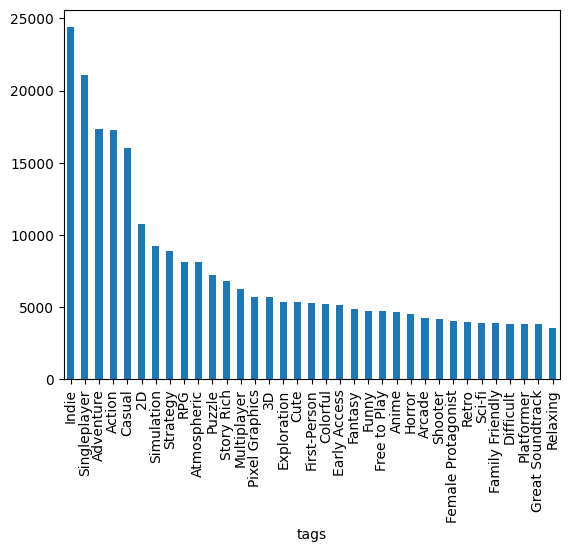

In [ ]:
df_with_descr_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False).head(35).plot(kind='bar')

Популярность тегов среди игр без описания

In [ ]:
df_empty_descr_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False).head(20)

tags
Action                   4087
Simulation               3118
Indie                    2762
Adventure                2309
Strategy                 1978
RPG                      1791
Casual                   1123
Violent                   935
Singleplayer              723
Gore                      720
Free to Play              650
Massively Multiplayer     470
Sports                    465
Multiplayer               446
Racing                    426
Atmospheric               421
Realistic                 390
Soundtrack                370
Open World                309
Family Friendly           294
Name: app_id, dtype: int64

Популярность тегов среди игр без описания в виде графика

<Axes: xlabel='tags'>

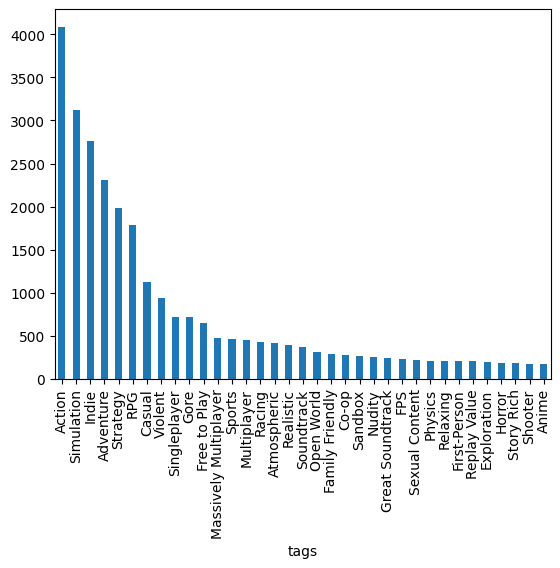

In [ ]:
df_empty_descr_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False).head(35).plot(kind='bar')

Общая популярность тегов

In [ ]:
df_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False).head(20)

tags
Indie             27148
Singleplayer      21832
Action            21373
Adventure         19614
Casual            17159
Simulation        12360
2D                10883
Strategy          10833
RPG                9896
Atmospheric        8525
Puzzle             7302
Story Rich         6986
Multiplayer        6727
Pixel Graphics     5757
3D                 5721
Exploration        5530
First-Person       5468
Cute               5445
Free to Play       5360
Colorful           5351
Name: app_id, dtype: int64

Общая популярность тегов в виде графика

<Axes: xlabel='tags'>

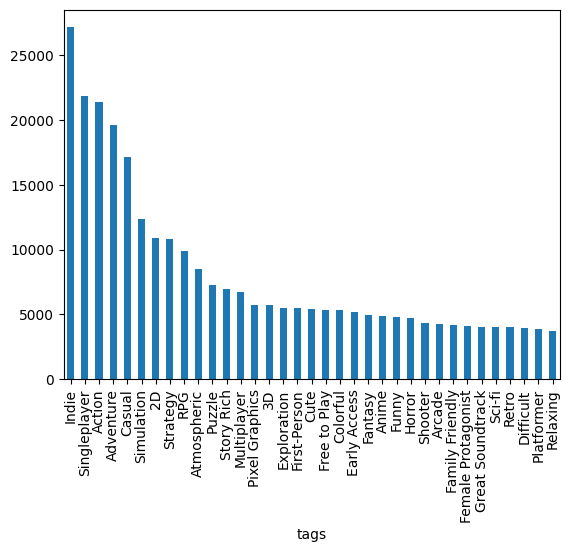

In [ ]:
df_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False).head(35).plot(kind='bar')

Разобьем теги на "группы" по популярности

In [ ]:
df_exploded_tag_counts = pd.DataFrame(df_exploded.groupby('tags')['app_id'].agg('count').sort_values(ascending=False)).reset_index()

In [ ]:
df_exploded_tag_counts.columns = ['tag','app_cnt']

In [ ]:
df_exploded_tag_counts

,tag,app_cnt
0,Indie,27148
1,Singleplayer,21832
2,Action,21373
3,Adventure,19614
4,Casual,17159
...,...,...
436,Volleyball,9
437,Tile-Matching,5
438,Coding,4
439,Hobby Sim,4


10 групп популярности тегов

In [ ]:
df_exploded_tag_counts['app_cnt_group'] = pd.cut(df_exploded_tag_counts['app_cnt'],10)

In [ ]:
df_exploded_tag_counts

,tag,app_cnt,app_cnt_group
0,Indie,27148,"(24433.6, 27148.0]"
1,Singleplayer,21832,"(21719.2, 24433.6]"
2,Action,21373,"(19004.8, 21719.2]"
3,Adventure,19614,"(19004.8, 21719.2]"
4,Casual,17159,"(16290.4, 19004.8]"
...,...,...,...
436,Volleyball,9,"(-23.144, 2718.4]"
437,Tile-Matching,5,"(-23.144, 2718.4]"
438,Coding,4,"(-23.144, 2718.4]"
439,Hobby Sim,4,"(-23.144, 2718.4]"


1. 392 тега встречаются меньше чем в 2719 играх, в среднем в 608 играх.
2. 31 тег встречается меньше чем в 5432 играх но больше чем в 2719, в среднем в 3892 играх
3. Остальные группы тегов малочисленны и намного более популярны чем первые две

In [ ]:
df_exploded_tag_counts.groupby('app_cnt_group')['app_cnt'].agg(['count','mean','min','max'])

,count,mean,min,max
app_cnt_group,,,,
"(-23.144, 2718.4]",392,608.298469,4.0,2662.0
"(2718.4, 5432.8]",31,3862.193548,2772.0,5360.0
"(5432.8, 8147.2]",8,6117.000000,5445.0,7302.0
"(8147.2, 10861.6]",3,9751.333333,8525.0,10833.0
"(10861.6, 13576.0]",2,11621.500000,10883.0,12360.0
"(13576.0, 16290.4]",0,NaN,NaN,NaN
"(16290.4, 19004.8]",1,17159.000000,17159.0,17159.0
"(19004.8, 21719.2]",2,20493.500000,19614.0,21373.0
"(21719.2, 24433.6]",1,21832.000000,21832.0,21832.0


Предыдущее в виде графика

<Axes: xlabel='app_cnt_group'>

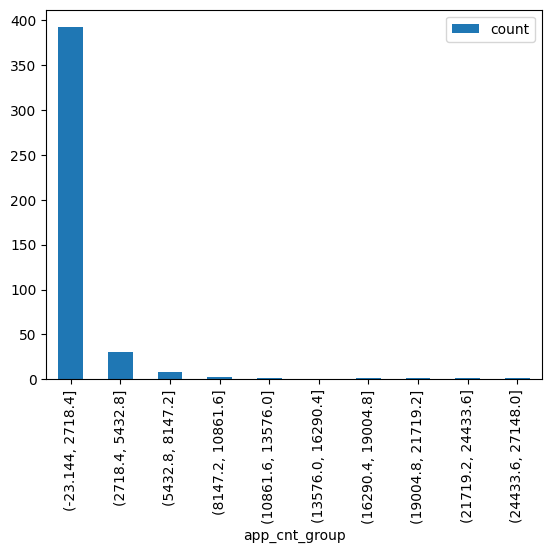

In [ ]:
df_exploded_tag_counts.groupby('app_cnt_group')['app_cnt'].agg(['count']).plot(kind='bar')

Все группы популярности тегов

In [ ]:
list(df_exploded_tag_counts['app_cnt_group'].unique())

[Interval(24433.6, 27148.0, closed='right'),
 Interval(21719.2, 24433.6, closed='right'),
 Interval(19004.8, 21719.2, closed='right'),
 Interval(16290.4, 19004.8, closed='right'),
 Interval(10861.6, 13576.0, closed='right'),
 Interval(8147.2, 10861.6, closed='right'),
 Interval(5432.8, 8147.2, closed='right'),
 Interval(2718.4, 5432.8, closed='right'),
 Interval(-23.144, 2718.4, closed='right')]

Интересно посмотреть на вторую с конца по популярности группу тегов. В ней достаточно много членов но они более популярны чем "основная масса".

In [ ]:
df_exploded_tag_counts[df_exploded_tag_counts['app_cnt_group'].astype('str') == '(2718.4, 5432.8]']['tag'].unique()

array(['Free to Play', 'Colorful', 'Early Access', 'Fantasy', 'Anime',
       'Funny', 'Horror', 'Shooter', 'Arcade', 'Family Friendly',
       'Female Protagonist', 'Great Soundtrack', 'Sci-fi', 'Retro',
       'Difficult', 'Platformer', 'Relaxing', 'Open World', 'Violent',
       'Co-op', 'Survival', 'Action-Adventure', 'Gore', 'Third Person',
       'Visual Novel', 'FPS', 'Comedy', 'VR', 'Psychological Horror',
       'Realistic', 'Sandbox'], dtype=object)

Интересно посмотреть на всех членов групп которые наиболее малочисленны но сосредоточили в себе основную популярность.

In [ ]:
df_exploded_tag_counts[(df_exploded_tag_counts['app_cnt_group'].astype('str') != '(2718.4, 5432.8]')
                       & (df_exploded_tag_counts['app_cnt_group'].astype('str') != '(-23.144, 2718.4]')
                      ]['tag'].unique()

array(['Indie', 'Singleplayer', 'Action', 'Adventure', 'Casual',
       'Simulation', '2D', 'Strategy', 'RPG', 'Atmospheric', 'Puzzle',
       'Story Rich', 'Multiplayer', 'Pixel Graphics', '3D', 'Exploration',
       'First-Person', 'Cute'], dtype=object)

Статистика количества тегов у всех игр.
---
У абсолютного большинства игр по 20 тегов что свидетельствует о "неполности" датасета. Вероятно это ограничение API/интерфейса из которого извлекали данные.


In [ ]:
pd.DataFrame(df_exploded.groupby('app_id')['tags'].count()) \
    .reset_index().groupby('tags').count() \
    .reset_index() \
    .sort_values('app_id',ascending=False) \
    .reset_index(drop=True) \
    .rename(columns={'tags':'tag_cnt', 'app_id': 'app_id_cnt'}) \
    .set_index('tag_cnt')

,app_id_cnt
tag_cnt,
20,15160
3,3280
4,3044
5,2965
2,2618
6,2291
1,2277
7,1860
8,1563


Кол-ва тегов в виде графика

<Axes: xlabel='tag_cnt'>

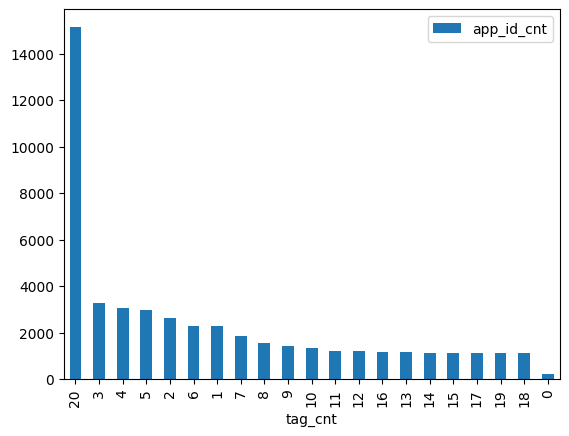

In [ ]:
pd.DataFrame(df_exploded.groupby('app_id')['tags'].count()) \
    .reset_index().groupby('tags').count() \
    .reset_index() \
    .sort_values('app_id',ascending=False) \
    .reset_index(drop=True) \
    .rename(columns={'tags':'tag_cnt', 'app_id': 'app_id_cnt'}) \
    .set_index('tag_cnt').plot(kind='bar')

Кол-ва тегов для игр с описанием

In [ ]:
pd.DataFrame(df_with_descr_exploded.groupby('app_id')['tags'].count()) \
    .reset_index().groupby('tags').count() \
    .reset_index() \
    .sort_values('app_id',ascending=False) \
    .reset_index(drop=True) \
    .rename(columns={'tags':'tag_cnt', 'app_id': 'app_id_cnt'}) \
    .set_index('tag_cnt')

,app_id_cnt
tag_cnt,
20,14976
5,2239
4,2007
6,1943
3,1769
7,1664
8,1435
9,1259
10,1185


Кол-ва тегов в виде графика для игр с описанием

<Axes: xlabel='tag_cnt'>

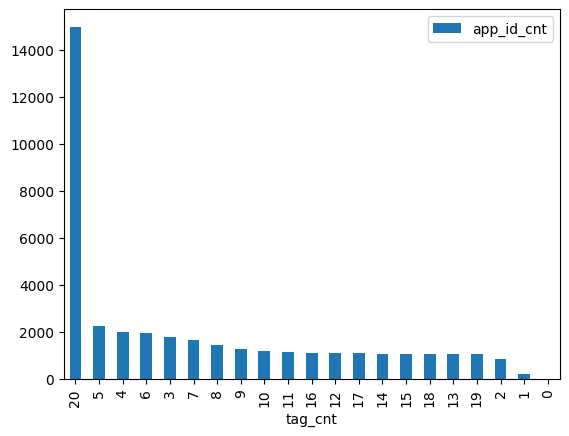

In [ ]:
pd.DataFrame(df_with_descr_exploded.groupby('app_id')['tags'].count()) \
    .reset_index().groupby('tags').count() \
    .reset_index() \
    .sort_values('app_id',ascending=False) \
    .reset_index(drop=True) \
    .rename(columns={'tags':'tag_cnt', 'app_id': 'app_id_cnt'}) \
    .set_index('tag_cnt').plot(kind='bar')

Анализ пар тегов
---
Размножим игры по тегам 2 раза чтобы определить пары тегов


In [ ]:
df_tag_pairs_exploded = df[['app_id','tags', 'tags']].copy()
df_tag_pairs_exploded.columns = ['app_id','tag1', 'tag2']
df_tag_pairs_exploded = df_tag_pairs_exploded.explode('tag1').explode('tag2')

In [ ]:
len(df_tag_pairs_exploded)

9117504

Уберем пары из одинаковых тегов

In [ ]:
df_tag_pairs_exploded = df_tag_pairs_exploded[df_tag_pairs_exploded['tag1'] != df_tag_pairs_exploded['tag2']]

In [ ]:
len(df_tag_pairs_exploded)

8550764

Для каждой пары тегов определим кол-во игр в которых она встречается

In [ ]:
tag_pair_count = df_tag_pairs_exploded.groupby(['tag1','tag2'])['app_id'].nunique().sort_values(ascending=False).copy()

In [ ]:
tag_pair_count = pd.DataFrame(tag_pair_count).reset_index()

In [ ]:
tag_pair_count.columns = ['tag1','tag2','app_cnt']

В наборе есть симметричные пары тегов, чтобы составить отдельное множество пар без симметричных дублей пар составим ключ дедубликации - для пары тегов это тег лексикографически старший и младший. У симметричных пар этот ключ одинаков

In [ ]:
def get_lex_older_tag(row):
    if row['tag1'] > row['tag2']:
        return row['tag1']
    return row['tag2']

def get_lex_younger_tag(row):
    if row['tag1'] > row['tag2']:
        return row['tag2']
    return row['tag1']

In [ ]:
tag_pair_count['tag_first'] = tag_pair_count.apply(get_lex_older_tag,axis=1)
tag_pair_count['tag_second'] = tag_pair_count.apply(get_lex_younger_tag,axis=1)

In [ ]:
tag_pair_count

,tag1,tag2,app_cnt,tag_first,tag_second
0,Indie,Singleplayer,13901,Singleplayer,Indie
1,Singleplayer,Indie,13901,Singleplayer,Indie
2,Indie,Adventure,12492,Indie,Adventure
3,Adventure,Indie,12492,Indie,Adventure
4,Indie,Action,12193,Indie,Action
...,...,...,...,...,...
137741,Card Battler,Social Deduction,1,Social Deduction,Card Battler
137742,Science,Dragons,1,Science,Dragons
137743,Political,Superhero,1,Superhero,Political
137744,Card Battler,Spaceships,1,Spaceships,Card Battler


In [ ]:
tag_pair_count_deduplicated = tag_pair_count[['tag_first','tag_second','app_cnt']].copy()

In [ ]:
tag_pair_count_deduplicated

,tag_first,tag_second,app_cnt
0,Singleplayer,Indie,13901
1,Singleplayer,Indie,13901
2,Indie,Adventure,12492
3,Indie,Adventure,12492
4,Indie,Action,12193
...,...,...,...
137741,Social Deduction,Card Battler,1
137742,Science,Dragons,1
137743,Superhero,Political,1
137744,Spaceships,Card Battler,1


Удаление дублей

In [ ]:
tag_pair_count_deduplicated = tag_pair_count_deduplicated.drop_duplicates().copy()

In [ ]:
tag_pair_count_deduplicated

,tag_first,tag_second,app_cnt
0,Singleplayer,Indie,13901
2,Indie,Adventure,12492
4,Indie,Action,12193
6,Indie,Casual,11888
8,Singleplayer,Adventure,10669
...,...,...,...
137179,Text-Based,Mini Golf,1
137196,Tennis,Logic,1
137436,FPS,Card Battler,1
137551,Otome,Capitalism,1


In [ ]:
len(tag_pair_count_deduplicated)

68873

Кол-во пар тегов которые встретились друг с другом более 5000 раз

In [ ]:
len(tag_pair_count_deduplicated[tag_pair_count_deduplicated['app_cnt'] > 5000])

27

Кол-во пар тегов, в том числе симметричных, которые встретились друг с другом более 5000 раз

In [ ]:
len(tag_pair_count[tag_pair_count['app_cnt'] > 5000])

54

In [ ]:
popular_tag_pair_count = tag_pair_count[tag_pair_count['app_cnt'] > 5000].copy()

Попробуем увидеть визуально какие теги с какими встречаются чаще

In [ ]:
heatmap = popular_tag_pair_count.pivot_table(index='tag1',columns='tag2',values='app_cnt')

In [ ]:
import seaborn as sns

<Axes: xlabel='tag2', ylabel='tag1'>

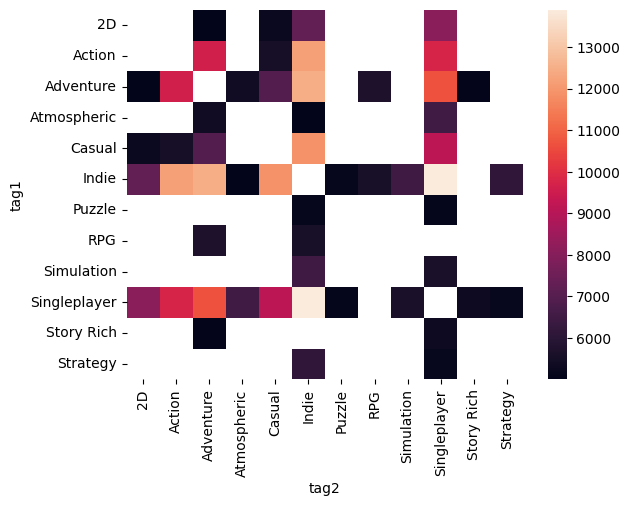

In [ ]:
sns.heatmap(heatmap)

Заполним пропуски

In [ ]:
popular_tag_pair_count['tag1'].unique()

array(['Indie', 'Singleplayer', 'Adventure', 'Action', 'Casual', '2D',
       'Atmospheric', 'Simulation', 'Strategy', 'RPG', 'Story Rich',
       'Puzzle'], dtype=object)

In [ ]:
popular_tag_pair_count['tag2'].unique()

array(['Singleplayer', 'Indie', 'Adventure', 'Action', 'Casual', '2D',
       'Atmospheric', 'Simulation', 'Strategy', 'RPG', 'Story Rich',
       'Puzzle'], dtype=object)

In [ ]:
popular_pair_tags = ['Indie', 'Singleplayer', 'Adventure', 'Action', 'Casual', '2D','Atmospheric', 'Simulation', 'Strategy', 'RPG', 'Story Rich','Puzzle']

In [ ]:
popular_tag_pair_count = tag_pair_count[
    (tag_pair_count['tag1'].isin(popular_pair_tags))
    & (tag_pair_count['tag2'].isin(popular_pair_tags))
].copy()

In [ ]:
heatmap = popular_tag_pair_count.pivot_table(index='tag1',columns='tag2',values='app_cnt')

<Axes: xlabel='tag2', ylabel='tag1'>

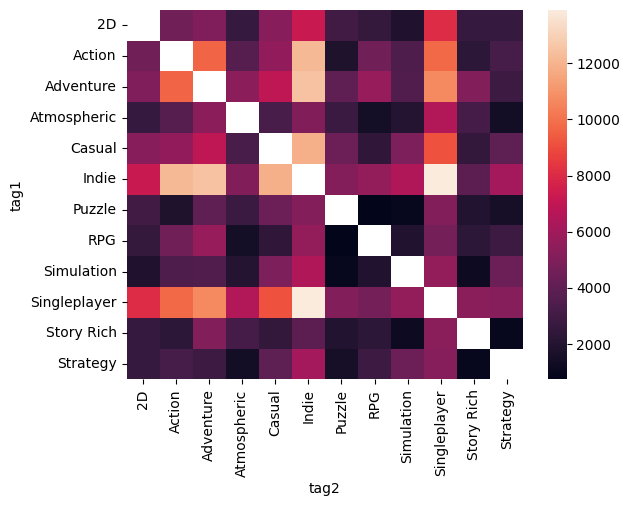

In [ ]:
sns.heatmap(heatmap)

Хочется убрать из общей массы indie и singleplayer

In [ ]:
popular_tag_pair_count = tag_pair_count[tag_pair_count['app_cnt'] > 4000].copy()

In [ ]:
popular_tag_pair_count['tag1'].unique()

array(['Indie', 'Singleplayer', 'Adventure', 'Action', 'Casual', '2D',
       'Atmospheric', 'Simulation', 'Strategy', 'RPG', 'Story Rich',
       'Puzzle', 'Multiplayer', 'Pixel Graphics', 'Shooter',
       'Exploration'], dtype=object)

In [ ]:
popular_pair_tags = ['Adventure', 'Action', 'Casual', '2D','Atmospheric', 'Simulation', 'Strategy', 'RPG', 'Story Rich','Puzzle', 'Multiplayer', 'Pixel Graphics', 'Shooter','Exploration']

In [ ]:
popular_tag_pair_count = tag_pair_count[
    (tag_pair_count['tag1'].isin(popular_pair_tags))
    & (tag_pair_count['tag2'].isin(popular_pair_tags))
].copy()

In [ ]:
heatmap = popular_tag_pair_count.pivot_table(index='tag1',columns='tag2',values='app_cnt')

<Axes: xlabel='tag2', ylabel='tag1'>

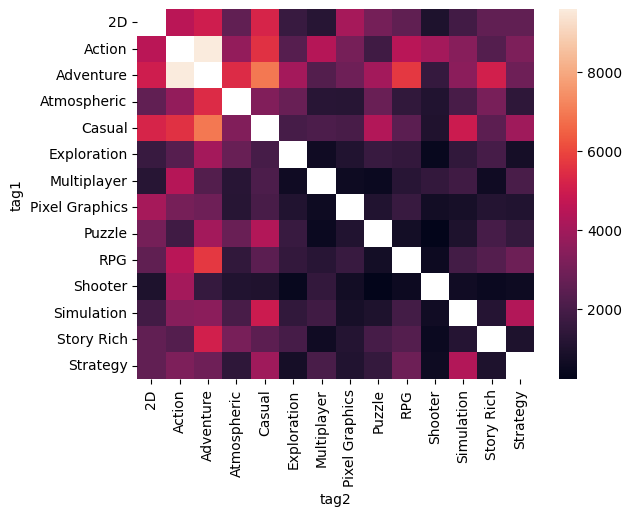

In [ ]:
sns.heatmap(heatmap)

Проанализируем пары тегов разбив их на группы по популярности

In [ ]:
tag_pair_count_deduplicated['app_cnt_group'] = pd.cut(tag_pair_count_deduplicated['app_cnt'],10)

1. 68526 пар тегов встретились в играх в среднем всего лишь 50 раз
2. 253 пары тегов встретились в играх в среднем 1902 раза
3. Остальные группы малочисленны и ожидаемо сосредоточили в себе всю основную популярность

In [ ]:
tag_pair_count_deduplicated.groupby('app_cnt_group')['app_cnt'].agg(['count','mean'])

,count,mean
app_cnt_group,,
"(-12.9, 1391.0]",68526,49.116496
"(1391.0, 2781.0]",253,1902.296443
"(2781.0, 4171.0]",60,3278.516667
"(4171.0, 5561.0]",17,4921.352941
"(5561.0, 6951.0]",7,6130.428571
"(6951.0, 8341.0]",2,7660.500000
"(8341.0, 9731.0]",2,9366.000000
"(9731.0, 11121.0]",2,10212.500000
"(11121.0, 12511.0]",3,12191.000000


Популярность пар тегов в виде графика

<Axes: xlabel='app_cnt_group'>

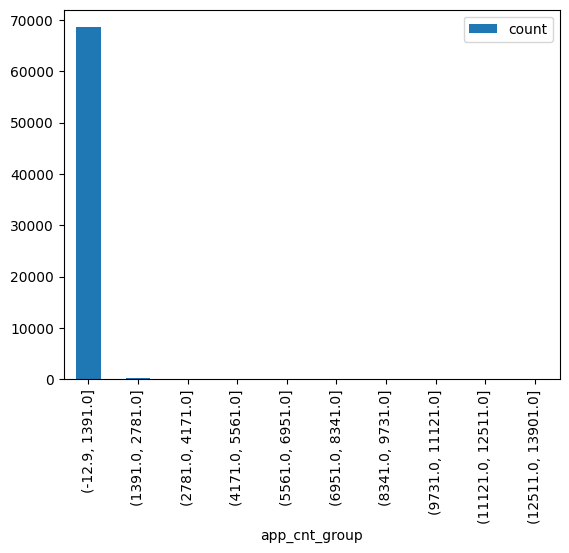

In [ ]:
tag_pair_count_deduplicated.groupby('app_cnt_group')['app_cnt'].agg(['count']).plot(kind='bar')

In [ ]:
tag_pair_count_deduplicated['tag_pair'] = tag_pair_count_deduplicated['tag_first'] + ' ' + tag_pair_count_deduplicated['tag_second']

Интересно взглянуть на группу пар тегов которая вплотную приблизилась к самым малочисленным и популярным парам

In [ ]:
tag_pair_count_deduplicated[tag_pair_count_deduplicated['app_cnt_group'].astype('str') == '(2781.0, 4171.0]']['tag_pair'].unique()

array(['Pixel Graphics 2D', 'Shooter Action', 'Exploration Adventure',
       'Singleplayer Multiplayer', 'Puzzle Adventure', 'Singleplayer 3D',
       'Strategy Casual', 'Pixel Graphics Indie',
       'Singleplayer Exploration', 'Story Rich Indie',
       'Singleplayer First-Person', 'Singleplayer Cute',
       'Singleplayer Pixel Graphics', 'Singleplayer Colorful',
       'Atmospheric Action', 'Singleplayer Fantasy',
       'Simulation Adventure', 'Cute Casual', 'Simulation Action',
       'First-Person Action', 'Multiplayer Indie', 'Indie Early Access',
       'Casual Atmospheric', 'Indie Free to Play', 'Singleplayer Funny',
       'Arcade Action', 'Strategy Action', 'Horror Adventure',
       'Colorful Casual', 'Story Rich Atmospheric', 'Indie Cute',
       'Singleplayer Great Soundtrack', 'Pixel Graphics Action',
       'Family Friendly Casual', 'Indie Horror', 'Puzzle 2D',
       'Indie First-Person', 'Singleplayer Family Friendly',
       'Relaxing Casual', 'First-Person Adventu

А теперь те самые самые малочисленные и популярные пары

In [ ]:
tag_pair_count_deduplicated[(tag_pair_count_deduplicated['app_cnt_group'].astype('str') != '(-12.9, 1391.0]')
                            & (tag_pair_count_deduplicated['app_cnt_group'].astype('str') != '(1391.0, 2781.0]')
                            & (tag_pair_count_deduplicated['app_cnt_group'].astype('str') != '(2781.0, 4171.0]')
                           ]['tag_pair'].unique()

array(['Singleplayer Indie', 'Indie Adventure', 'Indie Action',
       'Indie Casual', 'Singleplayer Adventure', 'Singleplayer Action',
       'Adventure Action', 'Singleplayer Casual', 'Singleplayer 2D',
       'Indie 2D', 'Casual Adventure', 'Singleplayer Atmospheric',
       'Simulation Indie', 'Strategy Indie', 'RPG Adventure',
       'Singleplayer Simulation', 'RPG Indie', 'Casual Action',
       'Atmospheric Adventure', 'Story Rich Singleplayer', 'Casual 2D',
       'Strategy Singleplayer', 'Puzzle Indie', 'Singleplayer Puzzle',
       'Story Rich Adventure', 'Indie Atmospheric', 'Adventure 2D',
       'Simulation Casual', 'Singleplayer RPG', 'Action 2D', 'RPG Action',
       'Multiplayer Action', 'Strategy Simulation', 'Puzzle Casual'],
      dtype=object)

Частота появления тегов в парах тегов
---
Посмотрим для каждого тега в каком кол-ве пар он фигурирует


In [ ]:
tag_occurences_in_pairs = pd.DataFrame(tag_pair_count.groupby('tag1')['tag2'].count().sort_values(ascending=False)).reset_index()

In [ ]:
tag_occurences_in_pairs.columns = ['tag', 'pair_cnt']

In [ ]:
tag_occurences_in_pairs.describe()

,pair_cnt
count,441.000000
mean,312.349206
std,96.860164
min,28.000000
25%,267.000000
50%,335.000000
75%,385.000000
max,440.000000


In [ ]:
tag_occurences_in_pairs

,tag,pair_cnt
0,Singleplayer,440
1,Indie,439
2,Casual,439
3,Action,437
4,Simulation,435
...,...,...
436,Snooker,38
437,Hobby Sim,35
438,Cricket,31
439,Tile-Matching,30


Разобьем на группы по популярности

In [ ]:
tag_occurences_in_pairs['occurence_group'] = pd.cut(tag_occurences_in_pairs['pair_cnt'],5)

In [ ]:
tag_occurences_in_pairs

,tag,pair_cnt,occurence_group
0,Singleplayer,440,"(357.6, 440.0]"
1,Indie,439,"(357.6, 440.0]"
2,Casual,439,"(357.6, 440.0]"
3,Action,437,"(357.6, 440.0]"
4,Simulation,435,"(357.6, 440.0]"
...,...,...,...
436,Snooker,38,"(27.588, 110.4]"
437,Hobby Sim,35,"(27.588, 110.4]"
438,Cricket,31,"(27.588, 110.4]"
439,Tile-Matching,30,"(27.588, 110.4]"


Ожидаемо основная масса тегов образовала много пар т.к. чтобы попасть в эту статистику достаточно даже одной пары

In [ ]:
tag_occurences_in_pairs.groupby('occurence_group')['pair_cnt'].agg(['count','mean'])

,count,mean
occurence_group,,
"(27.588, 110.4]",23,72.000000
"(110.4, 192.8]",39,152.589744
"(192.8, 275.2]",60,240.316667
"(275.2, 357.6]",136,319.264706
"(357.6, 440.0]",183,395.081967


В виде графика

<Axes: xlabel='occurence_group'>

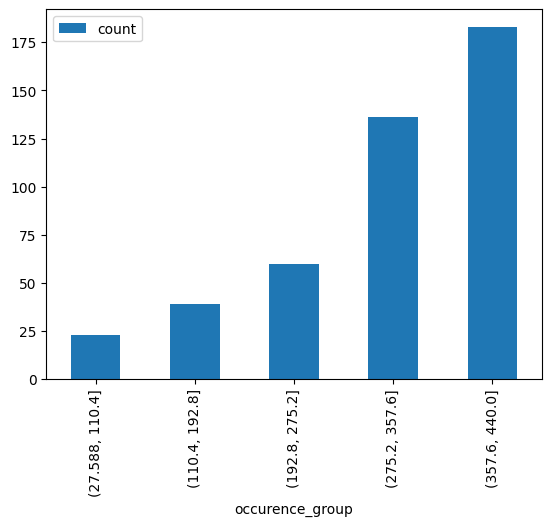

In [ ]:
tag_occurences_in_pairs.groupby('occurence_group')['pair_cnt'].agg(['count']).plot(kind='bar')

Интересно взглянуть на теги которые образовали мало пар даже при слабом условии учета пар (достаточно хотябы одного существующего примера пары)

In [ ]:
tag_occurences_in_pairs[tag_occurences_in_pairs['occurence_group'].astype('str') == '(27.588, 110.4]']['tag'].unique()

array(['Job Simulator', '8-bit Music', 'Voice Control', 'Boss Rush',
       'BMX', 'Hockey', 'Steam Machine', 'Reboot', 'TrackIR', 'Skiing',
       'Feature Film', 'Benchmark', 'Shop Keeper', 'Musou', 'Mahjong',
       'Volleyball', 'Rugby', 'Coding', 'Snooker', 'Hobby Sim', 'Cricket',
       'Tile-Matching', 'Fox'], dtype=object)

Усилим теперь условие учета пар тегов в общей статистике. Чтобы пара тегов анализировалась надо чтобы она встретилась в играх более 100 раз.

In [ ]:
popular_tag_occurences_in_pairs = pd.DataFrame(
    tag_pair_count[tag_pair_count['app_cnt'] > 100]
    .groupby('tag1')['tag2']
    .count()
    .sort_values(ascending=False)).reset_index()

In [ ]:
popular_tag_occurences_in_pairs.columns = ['tag', 'pair_cnt']

In [ ]:
popular_tag_occurences_in_pairs['occurence_group'] = pd.cut(popular_tag_occurences_in_pairs['pair_cnt'],5)

Ситуация изменилась кардинально, теги образуют в целом мало пар которые встречались в играх более 100 раз. 264 тега образовали не более 66 таких пар.

In [ ]:
popular_tag_occurences_in_pairs.groupby('occurence_group')['pair_cnt'].agg(['count'])

,count
occurence_group,
"(0.678, 65.4]",264
"(65.4, 129.8]",59
"(129.8, 194.2]",17
"(194.2, 258.6]",6
"(258.6, 323.0]",4


В виде графика

<Axes: xlabel='occurence_group'>

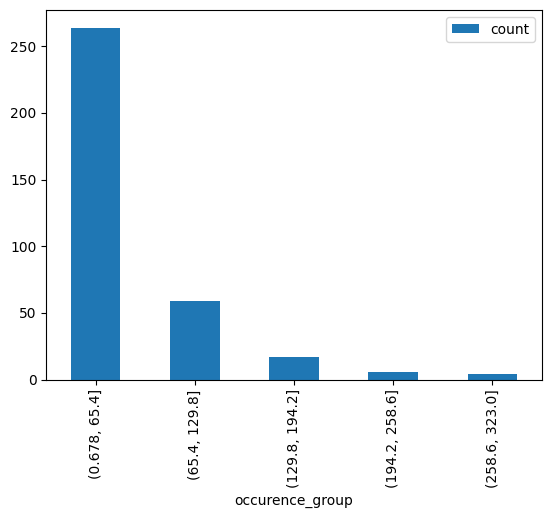

In [ ]:
popular_tag_occurences_in_pairs.groupby('occurence_group')['pair_cnt'].agg(['count']).plot(kind='bar')

Кластеризация
---

Сформируем список всех тегов

In [ ]:
tags_list = list(df.explode('tags').tags.unique())

In [ ]:
len(tags_list)

442

In [ ]:
tags_list_cleared = []
for tag in tags_list:
    if str(tag) != 'nan':
        tags_list_cleared.append(tag)

In [ ]:
len(tags_list_cleared)

441

In [ ]:
tags_list = tags_list_cleared

In [ ]:
df_clustered = df.copy()

In [ ]:
df_clustered

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
...,...,...,...
48313,1803600,Gone Rogue is a tactical stealth game with RPG...,"[Stealth, Action, Real Time Tactics, Isometric..."
48314,1811990,"Take on the elements in Wildfrost, a tactical ...","[Card Battler, Difficult, Roguelike Deckbuilde..."
48315,1868120,Competitive multiplayer match with vehicles an...,"[FPS, Third-Person Shooter, Multiplayer, Shoot..."
48316,2206390,Feel the Neon in Your Bones! How would you lik...,"[3D Platformer, Rhythm, Parkour, 3D, Atmospher..."


Кластеризовать игры будем по набору тегов. Для этого для каждого тега для каждой игры предусмотрим отдельный атрибут показывающий что игра обладает этим тегов или нет.

In [ ]:
def tag_is_in_list(row,**kwargs):
    tag = kwargs['tag_input']
    return (tag in row['tags']) * 1

Здесь можно обойтись и без apply, а просто генерирующими выражениями создавать вектора - столбцы для датафрейма. Это намного эффективнее.
Например так:
```
['tag' in tags for tags in list(df_clustered['tags'].values)]
```



In [ ]:
for tag in tags_list:
    df_clustered[tag] = df_clustered.apply(tag_is_in_list,tag_input=tag,axis=1)

In [ ]:
df_clustered

,app_id,description,tags,Zombies,World War II,FPS,Multiplayer,Action,Shooter,Co-op,...,Reboot,Benchmark,Feature Film,Steam Machine,Hockey,8-bit Music,Rugby,Tile-Matching,Coding,Fox
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti...",1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22364,,[Action],0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48313,1803600,Gone Rogue is a tactical stealth game with RPG...,"[Stealth, Action, Real Time Tactics, Isometric...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48314,1811990,"Take on the elements in Wildfrost, a tactical ...","[Card Battler, Difficult, Roguelike Deckbuilde...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48315,1868120,Competitive multiplayer match with vehicles an...,"[FPS, Third-Person Shooter, Multiplayer, Shoot...",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
48316,2206390,Feel the Neon in Your Bones! How would you lik...,"[3D Platformer, Rhythm, Parkour, 3D, Atmospher...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_clustered[tags_list].mean().sort_values(ascending=False)

Indie            0.561861
Singleplayer     0.451840
Action           0.442340
Adventure        0.405936
Casual           0.355126
                   ...   
Volleyball       0.000186
Tile-Matching    0.000103
Hobby Sim        0.000083
Coding           0.000083
Fox              0.000083
Length: 441, dtype: float64

Увидим глазами рисунок распределения всех тегов в датасете

<Axes: >

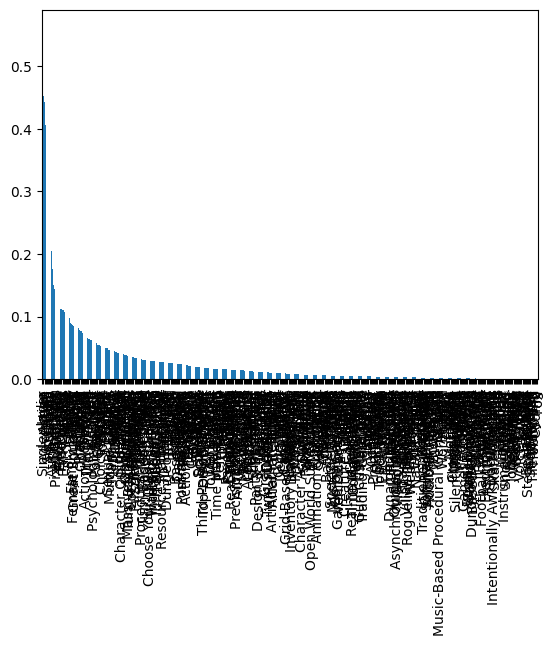

In [ ]:
df_clustered[tags_list].mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
tag_means = pd.DataFrame(df_clustered[tags_list].mean().sort_values(ascending=False)).reset_index()

In [ ]:
tag_means.columns = ['tag','percentage']

Срежем малочисленную верхушку чтобы увидеть как выглядит распределение для тегов которые встретились в менее чем 20% игр

<Axes: >

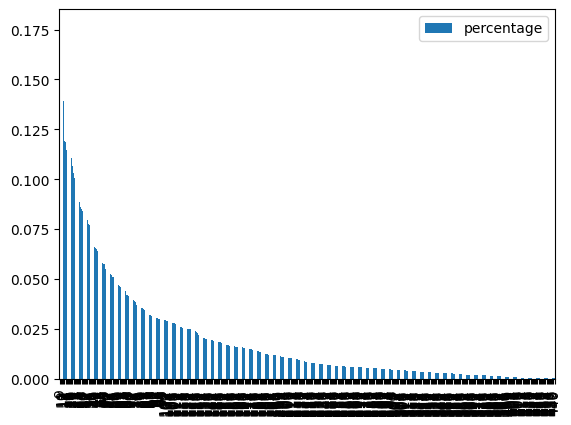

In [ ]:
tag_means[tag_means['percentage'] < 0.2].plot(kind='bar')

Создадим отдельные стандартизированные атрибуты из атрибутов обозначающих наличие у игры конкретного тега. Этого требует алгоритм кластеризации т.к. кластеризация будет работать по стандартизированным атрибутам.

In [ ]:
tags_list_stand = [tag + '_' + 'stand' for tag in tags_list]

In [ ]:
for i, tag in enumerate(tags_list_stand):
    df_clustered[tag] = (df_clustered[tags_list[i]] - df_clustered[tags_list[i]].mean(axis=0)) / df_clustered[tags_list[i]].std(axis=0)

In [ ]:
len(df_clustered)

48318

In [ ]:
import numpy as np

Один заход кластеризации, как проверено на практике, не дает ценного результата. Данные кластеризуются но остаётся одна или несколько многочисленных групп игр о которых ничего интересного нельзя сказать. Принято решение реккурсивно продолжать кластеризовывать сформированные кластеры игр пока не будет выполняться некое условие. В данном случае мы требуем чтобы кластеризация реккурсивно продолжалась пока кол-во игр в кластерах не станет менее 2500.

Создадим атрибут который будет обозначать "адрес" кластера в общем множестве кластеров. Он состоит из списка номеров кластеров. Каждый номер присваивается кластеру в результате работы механизма кластеризации

In [ ]:
df_clustered['cluster_list'] = [[] for _ in range(len(df_clustered))]

Атрибут обозначающий текущий номер кластера для текущей итерации кластеризации

In [ ]:
df_clustered['cluster'] = ''

In [ ]:
from sklearn.cluster import KMeans

Реккурсивная кластеризация

In [ ]:
def clusterize(df, # датасет который кластеризуем
               n_clusters, # кол-во изначальных (родительских) кластеров
               fields, # оригинальные поля по которым хотим кластеризовать
               fields_stand): # стандартный вид полей по которым кластеризуем

    # добавление нового номера кластера к общему списку кластеров (адресу кластера)
    # в результате очередной итерации кластеризации
    def add_cluster_to_list(row):
        if len(row['cluster_list']) > 0:
            cluster_list = list(row['cluster_list'])
            cluster_list.append(row['cluster'])
        else:
            cluster_list = [row['cluster']]
        return cluster_list

    # добавление кол-ва членов кластера (игр)
    def add_cluster_count(row, **kwargs):
        counts = kwargs['counts_input']
        return counts[row['cluster_list_str']]

    # статистика по полям по которым кластеризуем
    # сохраняем статистику по кластерам по полям датасета сюда
    # чтобы потом на нее смотреть и решать понятен нам этот кластер или нет
    cluster_stat_list = []

    # сама кластеризация методом k-means
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_clusters, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[fields_stand])
    # добавление нового номера кластера к "адресу" кластера
    df['cluster_list'] = df.apply(add_cluster_to_list,axis=1)
    # строчный вид "адреса" кластера (так надо)
    df['cluster_list_str'] = [str(customer_list) for customer_list in list(df['cluster_list'])]
    print(df['cluster_list_str'].value_counts())
    cluster_counts = {}

    # собираем кол-ва строк в кластерах
    for count in df['cluster_list_str'].value_counts().reset_index().values:
        cluster_counts[count[0]] = count[1]

    # собираем статистику по кластеру по полям по которым кластеризуем (наличие тегов)
    cluster_field_means = df.groupby('cluster_list_str')[fields].mean().reset_index().copy()
    cluster_field_means_unpivot = pd.melt(cluster_field_means, id_vars='cluster_list_str', value_vars=fields)
    cluster_field_means_unpivot['cluster_count'] = cluster_field_means_unpivot.apply(add_cluster_count,counts_input=cluster_counts, axis=1)
    cluster_stat_list = list(cluster_field_means_unpivot.values)

    # на очередном шаге кластеризации для всех кластеров в которых эл-ов более 2500 повторить кластеризацию
    # статистику по полям по которым кластеризуем сохранить в общую структуру
    for row in pd.DataFrame(df['cluster_list_str'].value_counts()).reset_index().values:
        if row[1] > 2500:
            df_rec = df[df['cluster_list_str'] == row[0]].copy()
            iter_n_clusters = len(df_rec) // 2500 + 1
            cluster_stat_list += clusterize(df_rec, iter_n_clusters, fields, fields_stand)
            del df_rec

    return cluster_stat_list

In [ ]:
cluster_stat_list = []

В выводе увидим: "адрес" кластера в общем "дереве" кластеров и кол-во эл-во в кластере

In [ ]:
cluster_stat_list = clusterize(df_clustered, 10, tags_list, tags_list_stand)

[4]    23154
[5]     9740
[6]     6651
[2]     3147
[1]     2543
[0]     2105
[3]      571
[8]      199
[7]      155
[9]       53
Name: cluster_list_str, dtype: int64
[4, 1]    8739
[4, 0]    7346
[4, 5]    6714
[4, 4]     290
[4, 9]      18
[4, 6]      13
[4, 7]      12
[4, 8]      10
[4, 2]       9
[4, 3]       3
Name: cluster_list_str, dtype: int64
[4, 1, 1]    6839
[4, 1, 0]    1619
[4, 1, 3]     256
[4, 1, 2]      25
Name: cluster_list_str, dtype: int64
[4, 1, 1, 1]    6347
[4, 1, 1, 0]     489
[4, 1, 1, 2]       3
Name: cluster_list_str, dtype: int64
[4, 1, 1, 1, 2]    4717
[4, 1, 1, 1, 0]    1576
[4, 1, 1, 1, 1]      54
Name: cluster_list_str, dtype: int64
[4, 1, 1, 1, 2, 0]    4697
[4, 1, 1, 1, 2, 1]      20
Name: cluster_list_str, dtype: int64
[4, 1, 1, 1, 2, 0, 0]    4684
[4, 1, 1, 1, 2, 0, 1]      13
Name: cluster_list_str, dtype: int64
[4, 1, 1, 1, 2, 0, 0, 0]    4620
[4, 1, 1, 1, 2, 0, 0, 1]      64
Name: cluster_list_str, dtype: int64
[4, 1, 1, 1, 2, 0, 0, 0, 1]    4615
[

In [ ]:
cluster_stat_list = pd.DataFrame(cluster_stat_list)

In [ ]:
cluster_stat_list

,0,1,2,3
0,[0],Zombies,0.010451,2105
1,[1],Zombies,0.018875,2543
2,[2],Zombies,0.038132,3147
3,[3],Zombies,0.001751,571
4,[4],Zombies,0.013475,23154
...,...,...,...,...
78052,"[1, 1]",Tile-Matching,0.000000,1992
78053,"[1, 0]",Coding,0.000000,551
78054,"[1, 1]",Coding,0.000000,1992
78055,"[1, 0]",Fox,0.000000,551


In [ ]:
cluster_stat_list.columns = ['cluster','tag', 'mean', 'count']

In [ ]:
cluster_stat_list[cluster_stat_list['cluster'] == '[0]']

,cluster,tag,mean,count
0,[0],Zombies,0.010451,2105
10,[0],World War II,0.010451,2105
20,[0],FPS,0.064608,2105
30,[0],Multiplayer,0.029454,2105
40,[0],Action,0.157245,2105
...,...,...,...,...
4360,[0],8-bit Music,0.000000,2105
4370,[0],Rugby,0.000000,2105
4380,[0],Tile-Matching,0.000000,2105
4390,[0],Coding,0.000000,2105


Всего получили уникальных N кластеров. Однако какие то из них промежуточные, т.е. состоят из других кластеров и так может быть по нескольку раз. А нам интересны как раз только "конечные" кластера.

In [ ]:
cluster_stat_list['cluster'].nunique()

Посмотрим на статистику по полям кластеризации (наличие тегов) у кластера с адресом [0]. Сразу большая удача, смотря на статистику можнео сразу понять что это за игры.

In [ ]:
cluster_stat_list[cluster_stat_list['cluster'] == '[0]'].sort_values(by='mean',ascending=False).head(20)

,cluster,tag,mean,count
490,[0],Anime,0.797625,2105
70,[0],Singleplayer,0.679335,2105
850,[0],Visual Novel,0.678385,2105
2050,[0],Sexual Content,0.625653,2105
410,[0],Casual,0.597625,2105
350,[0],Indie,0.576247,2105
710,[0],Nudity,0.568646,2105
190,[0],Adventure,0.552019,2105
280,[0],Story Rich,0.499287,2105
1180,[0],Romance,0.450831,2105


In [ ]:
cluster_stat_list.dtypes

cluster     object
tag         object
mean       float64
count        int64
dtype: object

Посмотрим на множество кластеров с кол-вом элементов более 500 из  "поддерева адресов" кластеров которое начинается с родительского кластера под номером 4

In [ ]:
cluster_stat_list[(cluster_stat_list['count'] >= 500)
                  & (cluster_stat_list['cluster'].str.contains('\[4,'))
                 ].groupby('cluster')['count'].max().sort_values(ascending=True).head(20)

cluster
[4, 0, 1, 1]                                                                       569
[4, 5, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]                                      651
[4, 0, 1, 2, 1, 1, 0]                                                              733
[4, 0, 1, 2, 1, 0]                                                                 882
[4, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1]                                                 1028
[4, 5, 1, 0, 1, 0, 0, 0, 1]                                                       1296
[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0]                                                 1431
[4, 1, 1, 1, 0]                                                                   1576
[4, 1, 0]                                                                         1619
[4, 5, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]    1648
[4, 5, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]    1722
[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0

In [ ]:
clusters_list = list(cluster_stat_list['cluster'].unique())

In [ ]:
clusters_list

['[0]',
 '[1]',
 '[2]',
 '[3]',
 '[4]',
 '[5]',
 '[6]',
 '[7]',
 '[8]',
 '[9]',
 '[4, 0]',
 '[4, 1]',
 '[4, 2]',
 '[4, 3]',
 '[4, 4]',
 '[4, 5]',
 '[4, 6]',
 '[4, 7]',
 '[4, 8]',
 '[4, 9]',
 '[4, 1, 0]',
 '[4, 1, 1]',
 '[4, 1, 2]',
 '[4, 1, 3]',
 '[4, 1, 1, 0]',
 '[4, 1, 1, 1]',
 '[4, 1, 1, 2]',
 '[4, 1, 1, 1, 0]',
 '[4, 1, 1, 1, 1]',
 '[4, 1, 1, 1, 2]',
 '[4, 1, 1, 1, 2, 0]',
 '[4, 1, 1, 1, 2, 1]',
 '[4, 1, 1, 1, 2, 0, 0]',
 '[4, 1, 1, 1, 2, 0, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0]',
 '[4, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1]',
 '[4, 1, 1, 1

Как уже было упомянуто ранее нам нужны только "конечные" кластера, а не промежуточные, которые содержат в себе подкластера или поддеревья кластеров. Для определения конечных кластеров напишем простую древовидную структуру, добавим туда все адреса и найдем листовые элементы (не имеющие детей). Это и будут конечные кластера.

In [ ]:
class ClusterTreeNode: # элемент дерева кластеров

    def __init__(self, cluster_id):
        self.cluster_id_str = cluster_id # адрес кластера в строчном виде
        self.cluster_id = cluster_id.strip('[]').split(',') # адрес кластера
        self.cluster_num = self.cluster_id[-1] # номер кластера (последнее значение из адреса)
        self.cluster_child_list = [] # список ссылок на детей кластера

class ClusterTree: # дерево кластеров

    def __init__(self, root_cluster_id):
        self.root = ClusterTreeNode(root_cluster_id) # корневой элемент

    def add_cluster(self, cluster_id): # добавление нового кластера
        new_cluster = ClusterTreeNode(cluster_id)
        last_cluster_num_iter = len(new_cluster.cluster_id) - 1
        current_cluster = self.root
        for i, cluster_num in enumerate(new_cluster.cluster_id):
            if i == last_cluster_num_iter:
                current_cluster.cluster_child_list.append(new_cluster)
            else:
                cluster_changed = 0
                for cluster in current_cluster.cluster_child_list:
                    if cluster.cluster_num == cluster_num:
                        current_cluster = cluster
                        cluster_changed = 1
                        break;
                if cluster_changed == 0:
                    raise ValueError(f'cluster_not_changed: no such cluster with cluster_num {cluster_num}. Tried to add cluster_id {str(new_cluster.cluster_id)}')

def find_tree_leaf_nodes(tree_node): # поиск по всему дереву кластеров без детей
    leafs = []
    for child in tree_node.cluster_child_list:
        if len(child.cluster_child_list) == 0:
            leafs += [child.cluster_id_str]
        else:
            leafs += find_tree_leaf_nodes(child)
    return leafs

В нашей реализации нужная такая затычка - root элемент

In [ ]:
tree = ClusterTree('[-1]')

Здесь список "адресов" кластеров отличается от того что получен выше. Потому что получены они были в разных средах и с разными версиями библиотек. Я не буду менять список адресов ниже чтобы не нарушать целостность представленного результата.

Добавляем все адреса кластеров а древовидную структуру

In [ ]:
for cluster in ['[0]',
 '[1]',
 '[2]',
 '[3]',
 '[4]',
 '[5]',
 '[6]',
 '[7]',
 '[8]',
 '[9]',
 '[4, 0]',
 '[4, 1]',
 '[4, 2]',
 '[4, 3]',
 '[4, 4]',
 '[4, 5]',
 '[4, 6]',
 '[4, 7]',
 '[4, 8]',
 '[4, 9]',
 '[4, 8, 0]',
 '[4, 8, 1]',
 '[4, 8, 2]',
 '[4, 8, 3]',
 '[4, 8, 4]',
 '[4, 8, 5]',
 '[4, 8, 2, 0]',
 '[4, 8, 2, 1]',
 '[4, 8, 2, 2]',
 '[4, 8, 2, 3]',
 '[4, 8, 2, 4]',
 '[4, 8, 2, 0, 0]',
 '[4, 8, 2, 0, 1]',
 '[4, 8, 2, 0, 2]',
 '[4, 8, 2, 0, 3]',
 '[4, 8, 2, 0, 4]',
 '[4, 8, 2, 0, 0, 0]',
 '[4, 8, 2, 0, 0, 1]',
 '[4, 8, 2, 0, 0, 2]',
 '[4, 8, 2, 0, 0, 3]',
 '[4, 8, 2, 0, 0, 3, 0]',
 '[4, 8, 2, 0, 0, 3, 1]',
 '[4, 8, 2, 0, 0, 3, 2]',
 '[4, 8, 2, 0, 0, 3, 0, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 2]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]',
 '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 1]',
 '[4, 8, 0, 0]',
 '[4, 8, 0, 1]',
 '[4, 8, 0, 0, 0]',
 '[4, 8, 0, 0, 1]',
 '[4, 8, 0, 0, 1, 0]',
 '[4, 8, 0, 0, 1, 1]',
 '[4, 2, 0]',
 '[4, 2, 1]',
 '[4, 2, 2]',
 '[4, 2, 0, 0]',
 '[4, 2, 0, 1]',
 '[4, 2, 0, 2]',
 '[4, 2, 0, 1, 0]',
 '[4, 2, 0, 1, 1]',
 '[4, 2, 0, 1, 2]',
 '[4, 2, 0, 1, 1, 0]',
 '[4, 2, 0, 1, 1, 1]',
 '[4, 2, 0, 1, 1, 2]',
 '[4, 2, 0, 1, 1, 1, 0]',
 '[4, 2, 0, 1, 1, 1, 1]',
 '[4, 2, 0, 1, 1, 1, 2]',
 '[4, 2, 0, 1, 1, 1, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 2]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]',
 '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]',
 '[5, 0]',
 '[5, 1]',
 '[5, 2]',
 '[5, 3]',
 '[5, 1, 0]',
 '[5, 1, 1]',
 '[5, 1, 1, 0]',
 '[5, 1, 1, 1]',
 '[5, 0, 0]',
 '[5, 0, 1]',
 '[6, 0]',
 '[6, 1]',
 '[6, 2]',
 '[6, 0, 0]',
 '[6, 0, 1]',
 '[2, 0]',
 '[2, 1]',
 '[2, 0, 0]',
 '[2, 0, 1]',
 '[2, 0, 0, 0]',
 '[2, 0, 0, 1]',
 '[1, 0]',
 '[1, 1]']:
    tree.add_cluster(cluster)

root элемент дерева

In [ ]:
tree.root.__dict__

{'cluster_id_str': '[-1]',
 'cluster_id': ['-1'],
 'cluster_num': '-1',
 'cluster_child_list': [<__main__.ClusterTreeNode at 0x1ed24cc3f08>,
  <__main__.ClusterTreeNode at 0x1ed24cc3c48>]}

Получаем все "конечные" кластера

In [ ]:
leaf_nodes = find_tree_leaf_nodes(tree.root)

In [ ]:
len(leaf_nodes)

84

В общей статистике по кластерам помечаем конечные

In [ ]:
cluster_stat_list['is_leaf'] = (cluster_stat_list['cluster'].isin(leaf_nodes)) * 1

In [ ]:
cluster_stat_list.groupby('cluster')['is_leaf'].max().sum()

84

In [ ]:
cluster_counts = pd.DataFrame(cluster_stat_list[
    (cluster_stat_list['is_leaf'] == 1)
][['cluster','count']].groupby('cluster')['count'].max()).reset_index()

In [ ]:
cluster_counts['count_group'] =  pd.cut(cluster_counts['count'],5)

In [ ]:
cluster_counts

,cluster,count,count_group
0,[0],2105,"(1870.8, 2338.0]"
1,"[1, 0]",1993,"(1870.8, 2338.0]"
2,"[1, 1]",551,"(469.2, 936.4]"
3,"[2, 0, 0, 0]",473,"(469.2, 936.4]"
4,"[2, 0, 0, 1]",2171,"(1870.8, 2338.0]"
...,...,...,...
79,"[6, 1]",2238,"(1870.8, 2338.0]"
80,"[6, 2]",1806,"(1403.6, 1870.8]"
81,[7],155,"(-0.336, 469.2]"
82,[8],199,"(-0.336, 469.2]"


Группы конечных кластеров по кол-ву эл-ов (игр) в них

In [ ]:
cluster_counts.groupby('count_group')['cluster'].count()

count_group
(-0.336, 469.2]     55
(469.2, 936.4]       8
(936.4, 1403.6]      5
(1403.6, 1870.8]     6
(1870.8, 2338.0]    10
Name: cluster, dtype: int64

Берем группу с самыми "мощными" кластерами

In [ ]:
cluster_counts[cluster_counts['count_group'].astype('str') == '(1870.8, 2338.0]']['cluster'].values

array(['[0]', '[1, 0]', '[2, 0, 0, 1]',
       '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]',
       '[4, 8, 2, 0, 0, 2]',
       '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]', '[5, 0, 0]',
       '[5, 1, 1, 1]', '[6, 0, 0]', '[6, 1]'], dtype=object)

Смотрим на кластера и пытаемся понять что это

In [ ]:
cluster_stat_list[cluster_stat_list['cluster'] == '[0]'].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
490,[0],Anime,0.797625,2105,1
70,[0],Singleplayer,0.679335,2105,1
850,[0],Visual Novel,0.678385,2105,1
2050,[0],Sexual Content,0.625653,2105,1
410,[0],Casual,0.597625,2105,1
350,[0],Indie,0.576247,2105,1
710,[0],Nudity,0.568646,2105,1
190,[0],Adventure,0.552019,2105,1
280,[0],Story Rich,0.499287,2105,1
1180,[0],Romance,0.450831,2105,1


In [ ]:
cluster_stat_list[cluster_stat_list['cluster'] == '[1, 0]'].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
55201,"[1, 0]",Strategy,0.734069,1993,1
55139,"[1, 0]",Singleplayer,0.711490,1993,1
55229,"[1, 0]",RPG,0.659308,1993,1
55403,"[1, 0]",Turn-Based Strategy,0.583041,1993,1
55297,"[1, 0]",Turn-Based Combat,0.510788,1993,1
55293,"[1, 0]",Turn-Based,0.500251,1993,1
55409,"[1, 0]",Turn-Based Tactics,0.495735,1993,1
55195,"[1, 0]",Indie,0.484195,1993,1
55179,"[1, 0]",Fantasy,0.445559,1993,1
55213,"[1, 0]",2D,0.431510,1993,1


In [ ]:
cluster_stat_list[cluster_stat_list['cluster'] == '[2, 0, 0, 1]'].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
54394,"[2, 0, 0, 1]",Simulation,0.781207,2171,1
54258,"[2, 0, 0, 1]",Singleplayer,0.759558,2171,1
54470,"[2, 0, 0, 1]",Building,0.579917,2171,1
54314,"[2, 0, 0, 1]",Indie,0.547213,2171,1
54320,"[2, 0, 0, 1]",Strategy,0.543528,2171,1
54392,"[2, 0, 0, 1]",Sandbox,0.532013,2171,1
54610,"[2, 0, 0, 1]",Management,0.530631,2171,1
54326,"[2, 0, 0, 1]",Casual,0.422847,2171,1
54358,"[2, 0, 0, 1]",Resource Management,0.369876,2171,1
54304,"[2, 0, 0, 1]",Open World,0.369415,2171,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
45133,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Simulation,0.998012,2012,1
45053,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Indie,0.427435,2012,1
45065,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Casual,0.293738,2012,1
44997,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Singleplayer,0.141153,2012,1
45021,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Adventure,0.104374,2012,1
44991,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Action,0.092445,2012,1
45225,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Free to Play,0.067594,2012,1
45087,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",RPG,0.056660,2012,1
45141,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Early Access,0.045726,2012,1
45049,"[4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...",Puzzle,0.040755,2012,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[4, 8, 2, 0, 0, 2]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
16086,"[4, 8, 2, 0, 0, 2]",RPG,0.994292,1927,1
16018,"[4, 8, 2, 0, 0, 2]",Indie,0.553191,1927,1
15894,"[4, 8, 2, 0, 0, 2]",Action,0.530358,1927,1
15954,"[4, 8, 2, 0, 0, 2]",Adventure,0.520498,1927,1
16030,"[4, 8, 2, 0, 0, 2]",Strategy,0.248573,1927,1
16042,"[4, 8, 2, 0, 0, 2]",Casual,0.139076,1927,1
15906,"[4, 8, 2, 0, 0, 2]",Singleplayer,0.118838,1927,1
16362,"[4, 8, 2, 0, 0, 2]",Free to Play,0.084069,1927,1
16074,"[4, 8, 2, 0, 0, 2]",Anime,0.078879,1927,1
15986,"[4, 8, 2, 0, 0, 2]",Fantasy,0.077322,1927,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
25586,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Action,0.748075,2338,1
25648,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Indie,0.251497,2338,1
25616,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Adventure,0.238238,2338,1
25996,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Design & Illustration,0.031223,2338,1
25592,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Singleplayer,0.025235,2338,1
26366,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Web Publishing,0.022241,2338,1
25676,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Anime,0.021814,2338,1
25584,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Multiplayer,0.019675,2338,1
25718,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Female Protagonist,0.018392,2338,1
25838,"[4, 8, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0]",Point & Click,0.017964,2338,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[5, 0, 0]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
49400,"[5, 0, 0]",Action,0.842489,2330,1
49406,"[5, 0, 0]",Singleplayer,0.815880,2330,1
49480,"[5, 0, 0]",2D,0.716309,2330,1
49462,"[5, 0, 0]",Indie,0.694421,2330,1
49436,"[5, 0, 0]",Platformer,0.602575,2330,1
49430,"[5, 0, 0]",Adventure,0.599571,2330,1
49476,"[5, 0, 0]",Pixel Graphics,0.485837,2330,1
49518,"[5, 0, 0]",Retro,0.399571,2330,1
49516,"[5, 0, 0]",Side Scroller,0.392275,2330,1
49474,"[5, 0, 0]",Casual,0.387124,2330,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[5, 1, 1, 1]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
48519,"[5, 1, 1, 1]",Action,0.934835,2087,1
48521,"[5, 1, 1, 1]",Shooter,0.697652,2087,1
48525,"[5, 1, 1, 1]",Singleplayer,0.652611,2087,1
48529,"[5, 1, 1, 1]",First-Person,0.642549,2087,1
48515,"[5, 1, 1, 1]",FPS,0.613321,2087,1
48517,"[5, 1, 1, 1]",Multiplayer,0.553905,2087,1
48581,"[5, 1, 1, 1]",Indie,0.486823,2087,1
48549,"[5, 1, 1, 1]",Adventure,0.410158,2087,1
48559,"[5, 1, 1, 1]",Atmospheric,0.333014,2087,1
48523,"[5, 1, 1, 1]",Co-op,0.324389,2087,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[6, 0, 0]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
51635,"[6, 0, 0]",Adventure,0.816969,1874,1
51611,"[6, 0, 0]",Singleplayer,0.797759,1874,1
51653,"[6, 0, 0]",Story Rich,0.739061,1874,1
51667,"[6, 0, 0]",Indie,0.637140,1874,1
51645,"[6, 0, 0]",Atmospheric,0.556564,1874,1
51685,"[6, 0, 0]",2D,0.513874,1874,1
51679,"[6, 0, 0]",Casual,0.440235,1874,1
51663,"[6, 0, 0]",Puzzle,0.408218,1874,1
51857,"[6, 0, 0]",Point & Click,0.395945,1874,1
51807,"[6, 0, 0]",Exploration,0.364995,1874,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[6, 1]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
50296,"[6, 1]",Singleplayer,0.858356,2238,1
50398,"[6, 1]",Casual,0.808311,2238,1
50374,"[6, 1]",Puzzle,0.752011,2238,1
50380,"[6, 1]",Indie,0.708222,2238,1
50557,"[6, 1]",Relaxing,0.600536,2238,1
50407,"[6, 1]",2D,0.546917,2238,1
50347,"[6, 1]",Atmospheric,0.518320,2238,1
50884,"[6, 1]",Colorful,0.475871,2238,1
50545,"[6, 1]",Family Friendly,0.474978,2238,1
50332,"[6, 1]",Adventure,0.457105,2238,1


Вторая по "мощности" группа конечных кластеров

In [ ]:
cluster_counts[cluster_counts['count_group'].astype('str') == '(1403.6, 1870.8]']['cluster'].values

array(['[4, 1]', '[4, 8, 0, 0, 1, 0]', '[4, 8, 0, 0, 1, 1]', '[5, 2]',
       '[5, 3]', '[6, 2]'], dtype=object)

In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[4, 1]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
5451,"[4, 1]",Violent,0.904219,1754,1
4451,"[4, 1]",Action,0.793615,1754,1
4531,"[4, 1]",Gore,0.688712,1754,1
4761,"[4, 1]",Indie,0.511973,1754,1
4601,"[4, 1]",Adventure,0.413341,1754,1
4931,"[4, 1]",RPG,0.266249,1754,1
4591,"[4, 1]",Horror,0.168187,1754,1
4791,"[4, 1]",Strategy,0.147662,1754,1
5161,"[4, 1]",Simulation,0.130559,1754,1
5121,"[4, 1]",Nudity,0.122577,1754,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[4, 8, 0, 0, 1, 0]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
28290,"[4, 8, 0, 0, 1, 0]",Puzzle,0.924370,1428,1
28294,"[4, 8, 0, 0, 1, 0]",Indie,0.809524,1428,1
28306,"[4, 8, 0, 0, 1, 0]",Casual,0.727591,1428,1
28262,"[4, 8, 0, 0, 1, 0]",Adventure,0.392857,1428,1
28238,"[4, 8, 0, 0, 1, 0]",Singleplayer,0.390756,1428,1
28300,"[4, 8, 0, 0, 1, 0]",Strategy,0.187675,1428,1
28312,"[4, 8, 0, 0, 1, 0]",2D,0.170168,1428,1
28232,"[4, 8, 0, 0, 1, 0]",Action,0.135154,1428,1
28484,"[4, 8, 0, 0, 1, 0]",Point & Click,0.107843,1428,1
28864,"[4, 8, 0, 0, 1, 0]",Match 3,0.107143,1428,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[4, 8, 0, 0, 1, 1]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
28295,"[4, 8, 0, 0, 1, 1]",Indie,0.851422,1723,1
28263,"[4, 8, 0, 0, 1, 1]",Adventure,0.615206,1723,1
28307,"[4, 8, 0, 0, 1, 1]",Casual,0.534533,1723,1
28239,"[4, 8, 0, 0, 1, 1]",Singleplayer,0.466628,1723,1
28233,"[4, 8, 0, 0, 1, 1]",Action,0.456761,1723,1
28269,"[4, 8, 0, 0, 1, 1]",Platformer,0.453279,1723,1
28313,"[4, 8, 0, 0, 1, 1]",2D,0.406268,1723,1
28309,"[4, 8, 0, 0, 1, 1]",Pixel Graphics,0.270459,1723,1
28485,"[4, 8, 0, 0, 1, 1]",Point & Click,0.156703,1723,1
28351,"[4, 8, 0, 0, 1, 1]",Retro,0.149158,1723,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[5, 2]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
45882,"[5, 2]",Action,0.713038,1603,1
45878,"[5, 2]",Multiplayer,0.684966,1603,1
45894,"[5, 2]",Singleplayer,0.619464,1603,1
46038,"[5, 2]",Local Multiplayer,0.580162,1603,1
46006,"[5, 2]",Indie,0.533999,1603,1
46030,"[5, 2]",Casual,0.509046,1603,1
46110,"[5, 2]",Arcade,0.504679,1603,1
46366,"[5, 2]",PvP,0.399875,1603,1
45890,"[5, 2]",Co-op,0.393637,1603,1
46198,"[5, 2]",Funny,0.388022,1603,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[5, 3]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
45883,"[5, 3]",Action,0.937129,1686,1
45895,"[5, 3]",Singleplayer,0.665480,1686,1
46007,"[5, 3]",Indie,0.631079,1686,1
46043,"[5, 3]",2D,0.585409,1686,1
45887,"[5, 3]",Shooter,0.503559,1686,1
46323,"[5, 3]",Action Roguelike,0.480427,1686,1
47039,"[5, 3]",Bullet Hell,0.472716,1686,1
46103,"[5, 3]",Roguelite,0.457295,1686,1
46111,"[5, 3]",Arcade,0.455516,1686,1
46067,"[5, 3]",Roguelike,0.447805,1686,1


In [ ]:
cluster_stat_list[
    cluster_stat_list['cluster'] == '[6, 2]'
].sort_values(by='mean', ascending=False).head(20)

,cluster,tag,mean,count,is_leaf
50330,"[6, 2]",Horror,0.894241,1806,1
50333,"[6, 2]",Adventure,0.809524,1806,1
50297,"[6, 2]",Singleplayer,0.771872,1806,1
50348,"[6, 2]",Atmospheric,0.745293,1806,1
50603,"[6, 2]",Psychological Horror,0.715393,1806,1
50381,"[6, 2]",Indie,0.660576,1806,1
50303,"[6, 2]",First-Person,0.625138,1806,1
50363,"[6, 2]",Dark,0.571429,1806,1
50591,"[6, 2]",Exploration,0.509967,1806,1
50360,"[6, 2]",Story Rich,0.499446,1806,1


Анализ описания игры
---

Проведем напоследок простой анализ описания игры

In [ ]:
len(df_with_descr)

39346

In [ ]:
! pip install catboost

In [ ]:
from catboost.text_processing import Tokenizer
import nltk
import os

nltk_data_path = os.path.join(os.path.dirname(nltk.__file__), 'nltk_data')
nltk.data.path.append(nltk_data_path)
nltk.download('wordnet', nltk_data_path)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maslo\Anaconda3\lib\site-
[nltk_data]     packages\nltk\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Приведем описания игр в "нормальный" вид и разобъем их на токены - слова в нормальном виде.

In [ ]:
def prepare_description(row):

    description = row['description']

    tokenizer = Tokenizer(
                lowercasing=True,
                separator_type='BySense',
                token_types=['Word', 'Number']
                )

    stop_words = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

    def filter_stop_words(tokens):
        return list(filter(lambda x: x not in stop_words, tokens))

    lemmatizer = nltk.stem.WordNetLemmatizer()

    def lemmatize_tokens_nltk(tokens):
        return list(map(lambda t: lemmatizer.lemmatize(t), tokens))

    description = lemmatize_tokens_nltk(filter_stop_words(tokenizer.tokenize(description)))

    return description

In [ ]:
df_with_descr['description_lemmatized'] = df_with_descr.apply(prepare_description,axis=1)

Также разобьем описания игр на пары токенов стоящих рядом

In [ ]:
def lemmatized_description_paired(row):

    description = row['description_lemmatized']
    prev = ''
    token_pair_list = []

    for lemma in description:
        if prev != '':
            token_pair_list.append(prev + ' ' + lemma)
        prev = lemma

    return token_pair_list

In [ ]:
df_with_descr['description_lemmatized_paired'] = df_with_descr.apply(lemmatized_description_paired, axis=1)

Размножим игры по тегам из списка тегов и токенам из описания

In [ ]:
tag_token_pairs = df_with_descr[['app_id','tags','description_lemmatized']].explode('tags').explode('description_lemmatized').copy()

In [ ]:
tag_token_pairs.columns = ['app_id', 'tag', 'token']

In [ ]:
tag_token_pairs = tag_token_pairs.groupby(['tag','token'])['app_id'].agg('nunique').reset_index().copy()

In [ ]:
tag_token_pairs.columns = ['tag', 'token','app_count']

Какие теги и токены часто встречаются вместе?

In [ ]:
tag_token_pairs[
    tag_token_pairs['token'] != 'game'
].sort_values(by='app_count', ascending=False).head(20)

,tag,token,app_count
1047866,Indie,world,3993
1815903,Singleplayer,world,3710
192791,Adventure,world,3651
164534,Adventure,adventure,3213
129824,Action,world,3097
1503650,Puzzle,puzzle,2708
1037931,Indie,puzzle,2545
1015094,Indie,adventure,2535
102466,Action,action,2326
1785182,Singleplayer,adventure,2320


Какие токены самые частые?

In [ ]:
app_tokens = df_with_descr[['app_id','description_lemmatized']].explode('description_lemmatized').copy()

In [ ]:
app_tokens.columns = ['app_id', 'token']

In [ ]:
app_tokens = app_tokens.groupby('token')['app_id'].agg('count').reset_index().copy()

In [ ]:
app_tokens.columns = ['token', 'app_count']

In [ ]:
app_tokens.sort_values(by='app_count', ascending=False).head(20)

,token,app_count
16296,game,18292
45885,world,7719
58552,™,4576
1215,adventure,4151
27766,new,4094
32456,puzzle,3951
31020,play,3828
31036,player,3811
40649,take,3275
49670,е,3037


Какие пары токенов встречаются чаще всего с какими тегами?

In [ ]:
tag_token_1x2_pairs = df_with_descr[['app_id','tags','description_lemmatized_paired']].explode('tags').explode('description_lemmatized_paired').copy()

In [ ]:
tag_token_1x2_pairs.columns = ['app_id', 'tag', 'token_pair']

In [ ]:
tag_token_1x2_pairs

,app_id,tag,token_pair
0,10090,Zombies,call duty
0,10090,Zombies,duty back
0,10090,Zombies,back redefining
0,10090,Zombies,redefining war
0,10090,Zombies,war like
...,...,...,...
48317,2330750,Transhumanism,inventory system
48317,2330750,Transhumanism,system vehicle
48317,2330750,Transhumanism,vehicle boat
48317,2330750,Transhumanism,boat npc


In [ ]:
tag_token_1x2_pairs = tag_token_1x2_pairs.groupby(['tag','token_pair'])['app_id'].nunique().reset_index().copy()

In [ ]:
tag_token_1x2_pairs.columns = ['tag', 'token_pair','app_count']

In [ ]:
tag_token_1x2_pairs.sort_values(by='app_count', ascending=False).head(20)

,tag,token_pair,app_count
5937930,Puzzle,puzzle game,1058
4301832,Indie,puzzle game,945
1772285,Casual,puzzle game,908
775288,Adventure,adventure game,844
7290531,Singleplayer,puzzle game,716
7771903,Strategy,strategy game,689
8597546,Visual Novel,visual novel,661
4093838,Indie,adventure game,648
7104209,Singleplayer,adventure game,562
4002661,Horror,horror game,550
